# Using grid lines but improving the corner detection

In [1]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
import skimage
from skimage.feature import blob_dog, blob_doh, blob_log, canny
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.segmentation import slic
from skimage.filters import sobel
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from skimage import measure
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick


In [106]:
path = '/home/fatima/Desktop/solar_orbiter_project/codes/targets/distortion/'
path_paper = '/home/fatima/Desktop/solar_orbiter_project/codes/notebooks/distortion/images_paper/'
#grid = pyfits.getdata(path+'solo_L0_0000015224_20170411T152003.fits')
grid = pyfits.getdata(path+'calibration_lines.fits')
dark = pyfits.getdata(path+'dark.fits')
#grid = grid/dark


#points = points[402:1813,52:1816] #circles
#grid = grid[135:1759,168:1792]

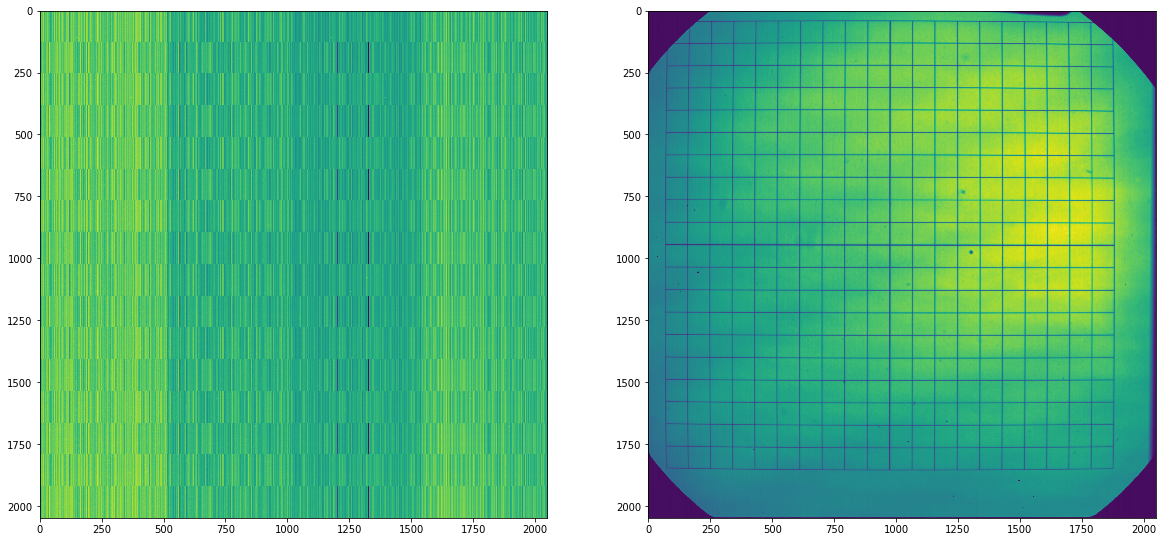

In [4]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(dark)
ax2.imshow(grid)

In [107]:
edge = sobel(grid)

In [4]:
#hdu = pyfits.PrimaryHDU(edge)
#hdu.writeto('edge.fits')

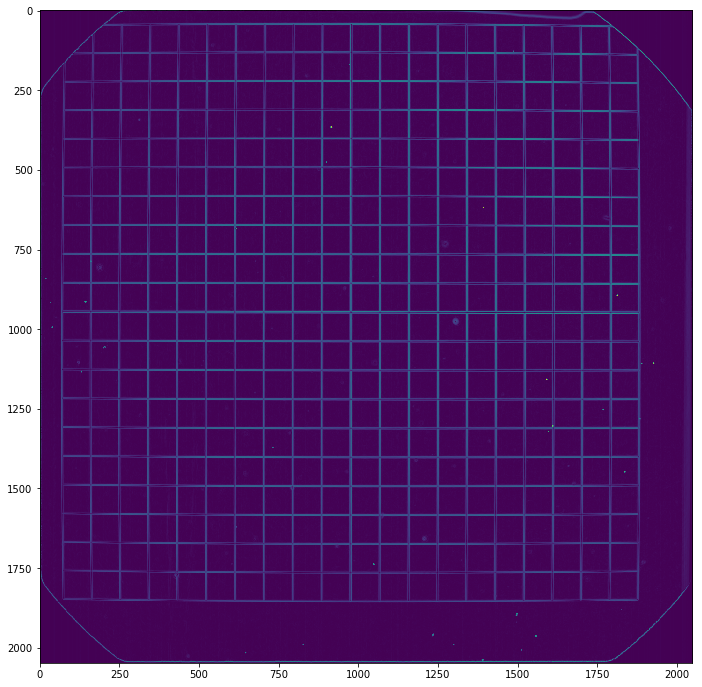

In [108]:
fig=plt.figure(figsize=(25,12))
plt.imshow(edge)


In [109]:
edges = edge/edge.mean()

In [34]:
#hdu = pyfits.PrimaryHDU(edges)
#hdu.writeto('edge_norm_2.fits')

In [110]:
mask = np.zeros((edge.shape[1],edge.shape[0]))
for i in range(edge.shape[1]):
    for j in range(edge.shape[0]):
        if edges[i][j] > 3:
            mask[i][j] = 1
        else:
            mask[i][j] = 0



In [36]:
#hdu = pyfits.PrimaryHDU(mask)
#hdu.writeto('mask_grid_sobel.fits')

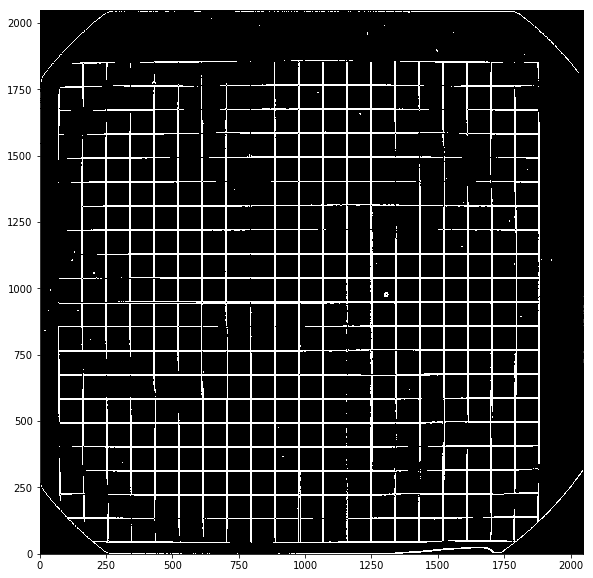

In [111]:
fig=plt.figure(figsize=(10,10))
plt.imshow(mask,origin='lower',cmap='gray')
#plt.savefig(path_paper+'mask_grid.png',dpi=300)


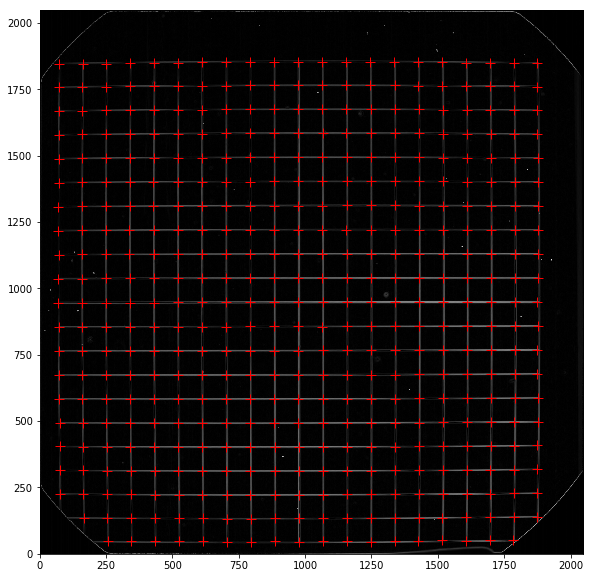

In [112]:
response = corner_harris(mask, k=0.1,sigma=20)
coords = corner_peaks(response)#, num_peaks=3000)
coords_subpix = corner_subpix(mask, coords, window_size=25, alpha=0.9)

figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.imshow(edges, cmap='gray', origin='bottom')
#ax.plot(coords[:,1], coords[:,0],color='cyan', marker='o',linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=10)
#plt.savefig(path_paper+'grid_edges.png',dpi=300)


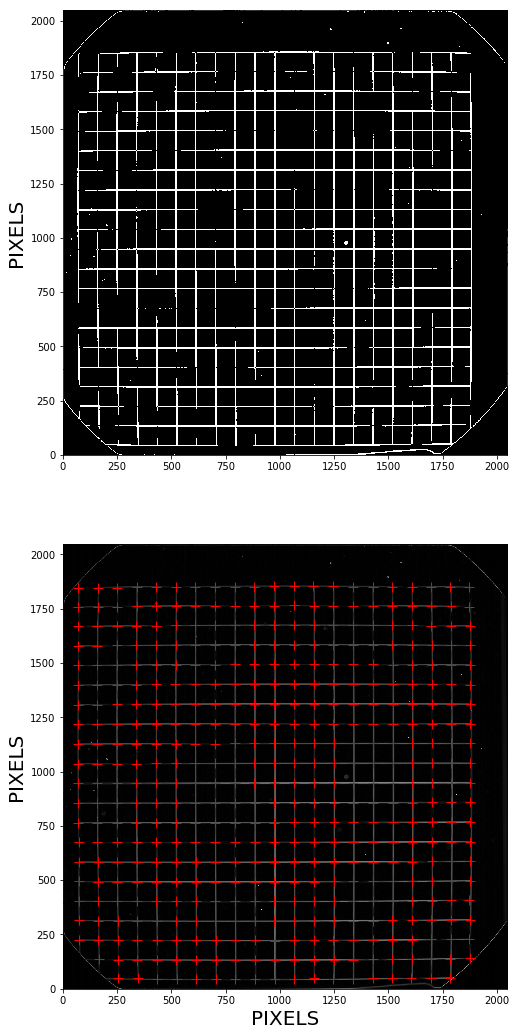

In [124]:
## for paper:

fig=plt.figure(figsize=(10,18))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.imshow(mask,origin='lower',cmap='gray')
ax2.imshow(edges, cmap='gray', origin='bottom')
ax2.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=10)
ax1.set_ylabel('PIXELS',fontsize=20)
ax2.set_ylabel('PIXELS',fontsize=20)
ax2.set_xlabel('PIXELS',fontsize=20)
plt.savefig(path_paper+'grid_lines.png',dpi=250)

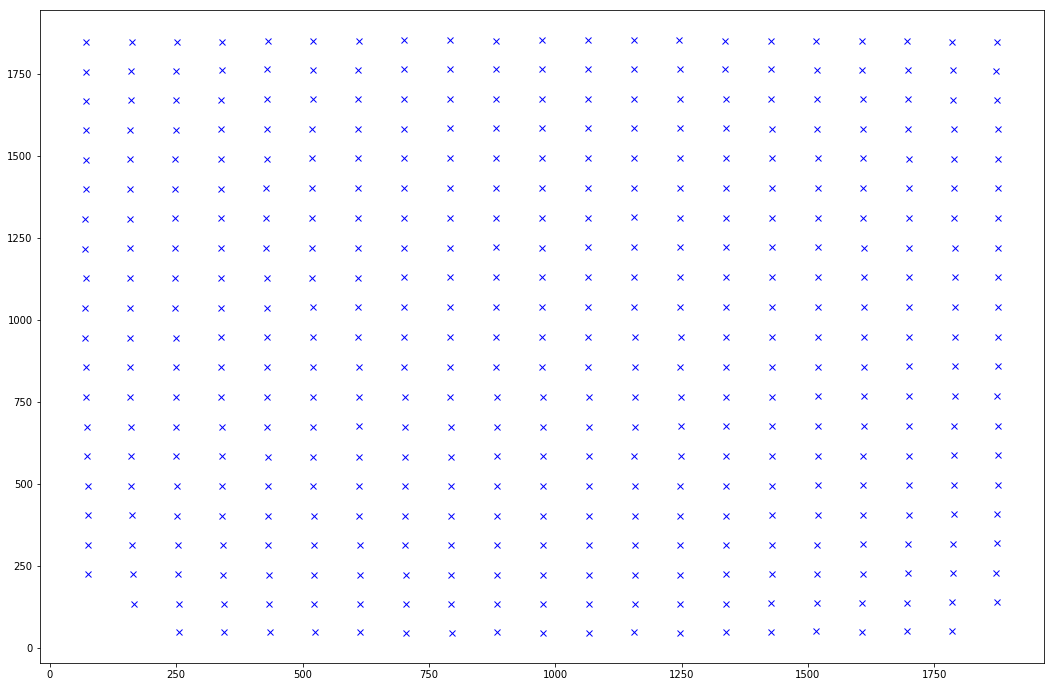

In [11]:
y = coords[:,0]
x = coords[:,1]
y_sub = coords_subpix[:,0]
x_sub = coords_subpix[:,1]
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
#plt.plot(x,y,'rx')
ax1.plot(x_sub, y_sub,'bx')
plt.show()


In [17]:

F = open('/home/fatima/Desktop/solar_orbiter_project/codes/dont_touch/coordinates_linear_grid','w')
for i in range(len(x)):
    F.write(str(x_sub[i])+' '+str(y_sub[i])+'\n')
F.close()


# Distortion work

In [3]:

f = np.loadtxt('/home/fatima/Desktop/solar_orbiter_project/codes/dont_touch/coordinates_linear_grid')
x = f[:,0]
y = f[:,1]

#x = coords_subpix[:,1]
#y = coords_subpix[:,0]


In [90]:
2048/21.

97.52380952380952

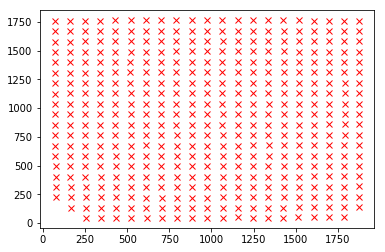

In [4]:
LINES = []

for n in range(20):
    temp = []
    for m in range(len(y)):#len(coords_subpix[:,0])):
        if (y[m] > 92*n) & (y[m]<92*(n+1)):
              temp.append([x[m], y[m]])
    temp = np.array(temp)
    LINES.append(temp)
   
for i in range(20):
    X = LINES[i][:,0]
    Y = LINES[i][:,1]
    plt.plot(X,Y,'rx')
    
plt.show()



In [5]:
LINES = np.delete(LINES,[0])

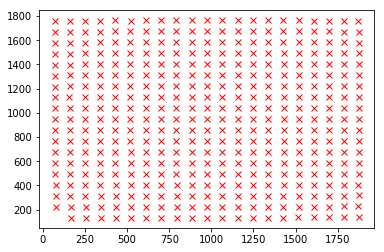

In [6]:
for i in range(19):
    X = LINES[i][:,0]
    Y = LINES[i][:,1]
    plt.plot(X,Y,'rx')
    
plt.show()



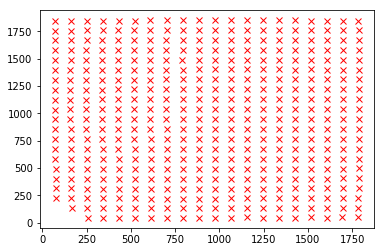

In [7]:

#print np.sort(x)
COLUMNS = []

for n in range(20):
    temp = []
    for m in range(len(x)):#(len(coords_subpix[:,0])):
        if (x[m] >90*n) & (x[m]<90*(n+1)):
              temp.append([x[m], y[m]])
    temp = np.array(temp)
    COLUMNS.append(temp)
    
for i in range(20):
    X = COLUMNS[i][:,0]
    Y = COLUMNS[i][:,1]
    #print COLUMNS[i].shape
    plt.plot(X,Y,'rx')
    
plt.show()



In [8]:
COLUMNS = np.delete(COLUMNS,[0])

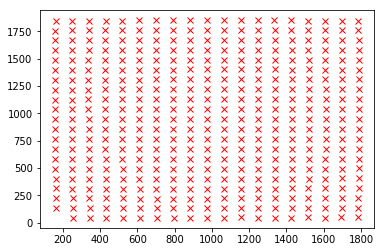

In [9]:
for i in range(19):
    X = COLUMNS[i][:,0]
    Y = COLUMNS[i][:,1]
    #print COLUMNS[i].shape
    plt.plot(X,Y,'rx')
    
plt.show()



1023.5

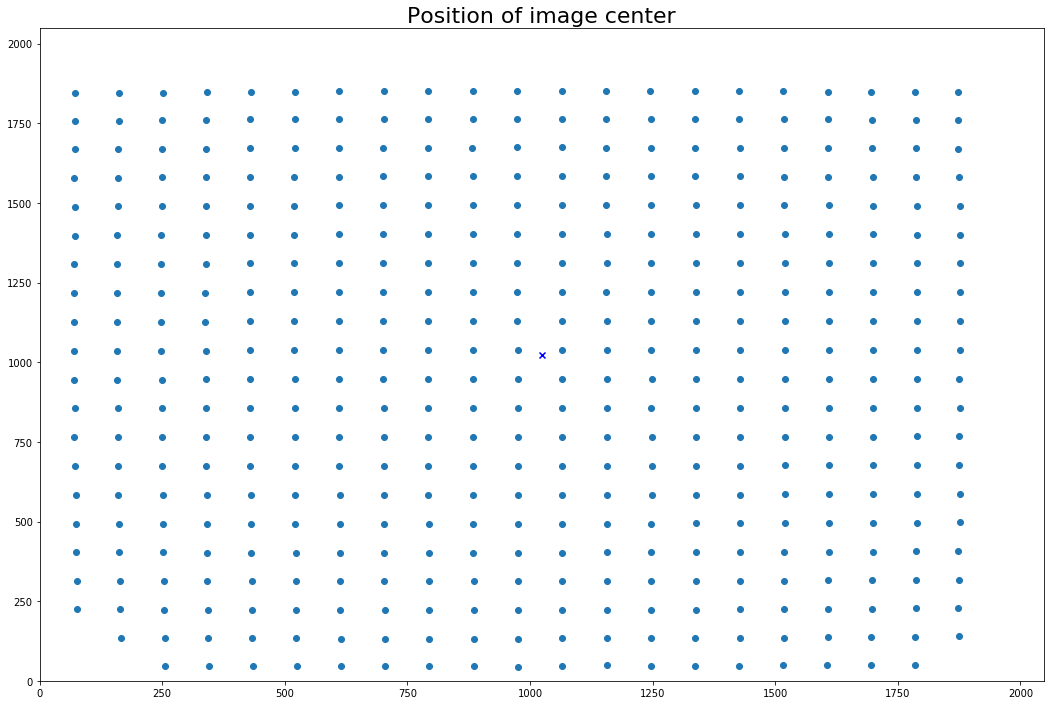

In [11]:
fig = plt.figure(figsize=(18,12))

Ny, Nx = grid.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]
plt.scatter(xc,yc,marker='x',color='b')
#plt.plot(coords_subpix[:,1], coords_subpix[:,0],'rx')
plt.scatter(x,y)
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.title('Position of image center',fontsize=22)
Nx
Ny
xc

In [12]:
def parabola_lines(x,a,b,c):
    y = a*x**2 + b*x + c
    return y
def parabola_columns(y,m,n,p):
    x = m*y**2 + n*y + p
    return x


(20,) (20,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)


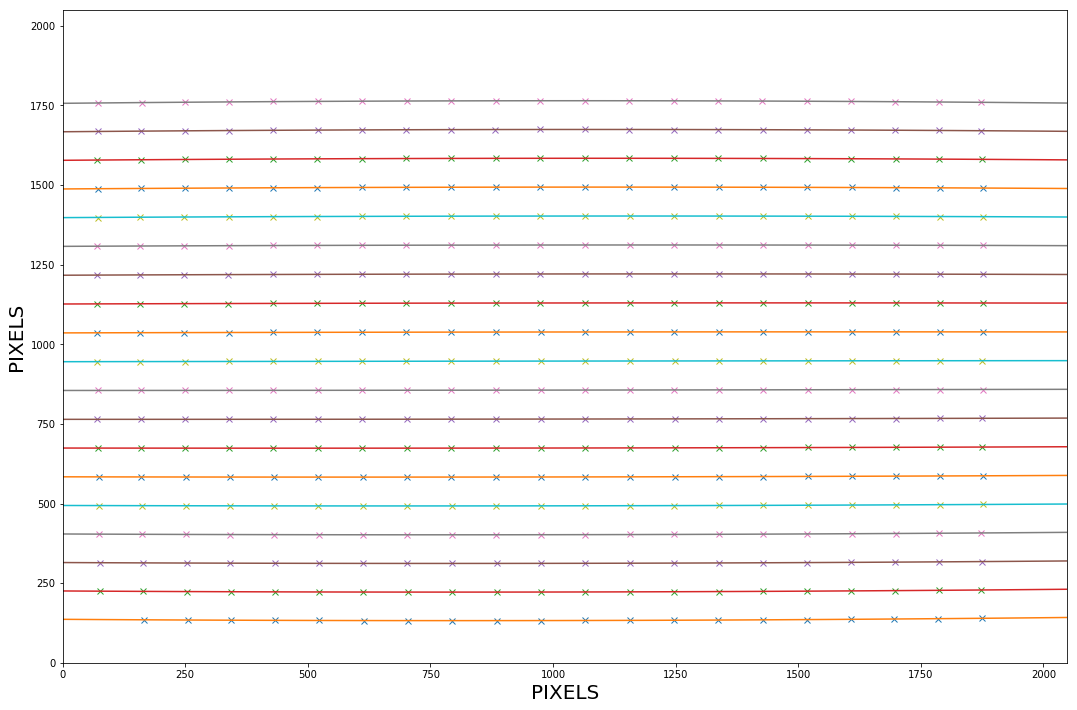

In [126]:
plt.clf()
fig=plt.figure(figsize=(18,12))

ax = fig.add_subplot(111)
ax.set_xlabel('PIXELS',fontsize=20)
ax.set_ylabel('PIXELS',fontsize=20)

n=0
A = np.zeros(len(LINES))
B = np.zeros(len(LINES))
C = np.zeros(len(LINES))
for i in range(len(LINES)):
    x = LINES[i][:,0]; y = LINES[i][:,1]
    print x.shape, y.shape
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_lines,x,y,p0,maxfev=5000)
    A[n] = popt[0]; B[n] = popt[1]; C[n] = popt[2]
    xnew = np.linspace(0, 2048, 100)
    ynew = parabola_lines(xnew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    
    n=n+1

#plt.legend(loc='best')
plt.savefig(path_paper+'para_lines.png',dpi=250)


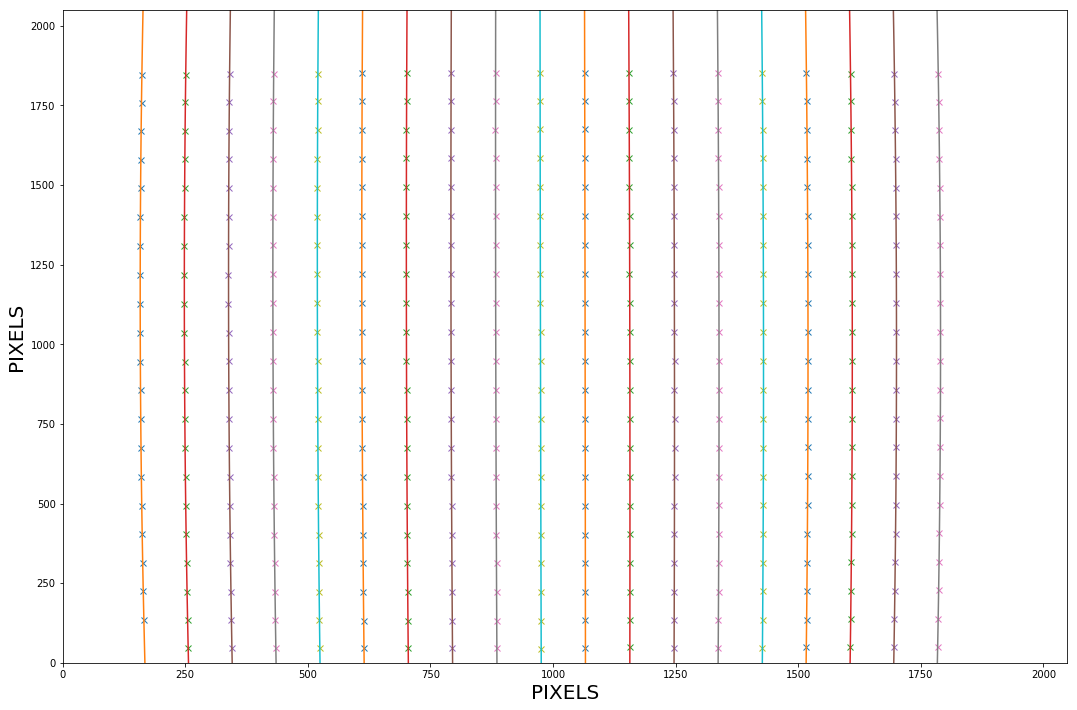

In [127]:
plt.clf()
fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
n=0
ax.set_xlabel('PIXELS',fontsize=20)
ax.set_ylabel('PIXELS',fontsize=20)
M = np.zeros(len(COLUMNS))
N =  np.zeros(len(COLUMNS))
P =  np.zeros(len(COLUMNS))

for i in range(len(COLUMNS)):
    x = COLUMNS[i][:,0]; y = COLUMNS[i][:,1]
    temp1 = np.array([[y[0]**2,y[1]**2,y[1]**2], [y[0],y[1],y[2]],[1,1,1]])
    temp2 = np.array([x[0], x[1],x[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_columns, y,x,p0)
    M[n]=popt[0]; N[n] = popt[1]; P[n] = popt[2]
    ynew = np.linspace(0, 2048, 100)
    xnew = parabola_columns(ynew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    n=n+1
#plt.savefig()
#plt.legend()
plt.savefig(path_paper+'para_columns.png',dpi=250)


In [15]:
'''
A= np.delete(A,[0])
B= np.delete(B,[0])
C= np.delete(C,[0])
M= np.delete(M,[0])
N= np.delete(N,[0])
P= np.delete(P,[0])

'''

'\nA= np.delete(A,[0])\nB= np.delete(B,[0])\nC= np.delete(C,[0])\nM= np.delete(M,[0])\nN= np.delete(N,[0])\nP= np.delete(P,[0])\n\n'

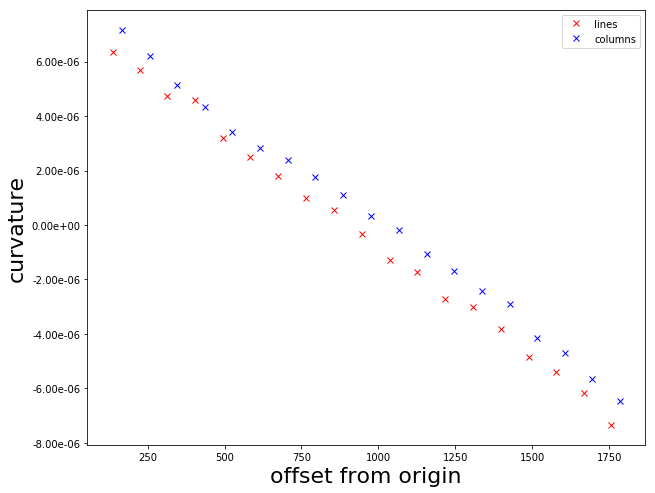

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C,A,'rx',label='lines')
ax.plot(P,M,'bx',label='columns')
ax.set_xlabel('offset from origin',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
#ax.set_xlim(P.min(), P.max())
#ax.set_ylim(A.min(), A.max())
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

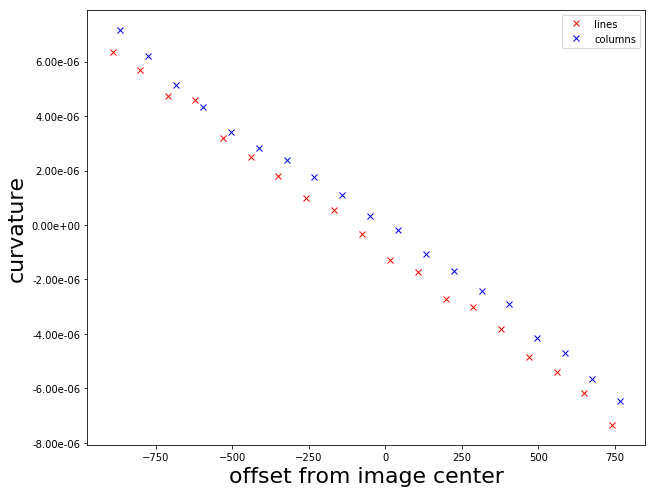

In [20]:

C_2 = A*xc**2 + B*xc + C - yc
P_2 = M*yc**2 + N*yc + P - xc
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C_2,A,'rx',label='lines')
ax.plot(P_2,M,'bx',label='columns')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

3.22632402486e-10 1.89783766168e-11
2.97928188733e-10 1.75251875725e-11


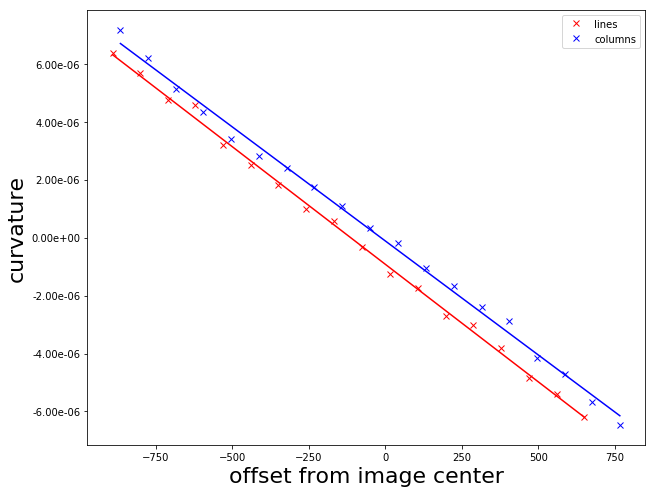

In [22]:
t = np.polyfit(C_2[:-1], A[:-1], 1)
tnew = np.linspace(C_2[:-1].min(),C_2[:-1].max(),100)
model = np.poly1d(t)
Tnew = model(tnew)
## GOODNESS OF FIT
chi_sq_w_lines = np.sum((model(A)-A)**2)
red_chi_sq_lines = chi_sq_w_lines/(len(A)-len(t))
print chi_sq_w_lines,red_chi_sq_lines




t2 = np.polyfit(np.delete(P_2,[1]),np.delete(M,[1]) , 1)
tnew2 = np.linspace(P_2.min(),P_2.max(),100)
model2 = np.poly1d(t2)
Tnew2 = model2(tnew2)
## goodness of fit
chi_sq_w_cols = np.sum((model2(M)-M)**2)
red_chi_sq_cols = chi_sq_w_cols/(len(M)-len(t2))
print chi_sq_w_cols ,red_chi_sq_cols

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C_2[:-1],A[:-1],'rx',label='lines')
ax.plot(tnew,Tnew,'r')
ax.plot(P_2,M,'bx',label='columns')
ax.plot(tnew2, Tnew2, 'b')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')
plt.savefig(path_paper+'fits.png',dpi=300)

In [19]:
## Finding distortion center:

del_lines = -t[1]/t[0]
del_columns = -t2[1]/t2[0]
y_d = del_lines+yc
x_d = del_columns + xc
print 'the distortion center is:', (x_d,y_d)
del_lines, del_columns

the distortion center is: (1009.3185143206963, 910.47701138025911)


(-113.02298861974093, -14.181485679303739)

# Refining the distortion center calculation

In [78]:
Ny, Nx = grid.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xd = center[1]
yd = center[0]
C_2 = A*xc**2 + B*xc + C - yd #lines
P_2 = M*yc**2 + N*yc + P - xd #columns
trials = 10
i=0
temp_x = temp_y = np.zeros((10))


In [79]:
for n in range(trials):
    
    t = np.polyfit(C_2, A, 1)
    t2 = np.polyfit(P_2, M, 1)
    
    del_lines = -t[1]/t[0]
    del_columns = -t2[1]/t2[0]
    yd = del_lines+yd
    xd = del_columns + xd
    print 'the distortion center is:', (xd,yd)
    print del_lines, del_columns
   
    C_2 = A*x_d**2 + B*x_d + C - yd#lines
    P_2 = M*y_d**2 + N*y_d + P - xd #columns
    temp_x[i] = xd
    temp_y[i] = yd
    i=i+1

the distortion center is: (1010.5944626864181, 908.13305369656325)
-115.366946303 -12.9055373136
the distortion center is: (1010.7216076251763, 908.11184129045171)
-0.0212124061115 0.127144938758
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 -1.27234115599e-13
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.49484720062e-14
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.49484720062e-14
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.49484720062e-14
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.49484720062e-14
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.49484720062e-14
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.49484720062e-14
the distortion center is: (1010.7216076251761, 908.11184129045171)
-5.075990296e-14 3.494

In [80]:
## The final center of distortion:
x_d = xd
y_d = yd

NameError: name 'coords_subpix' is not defined

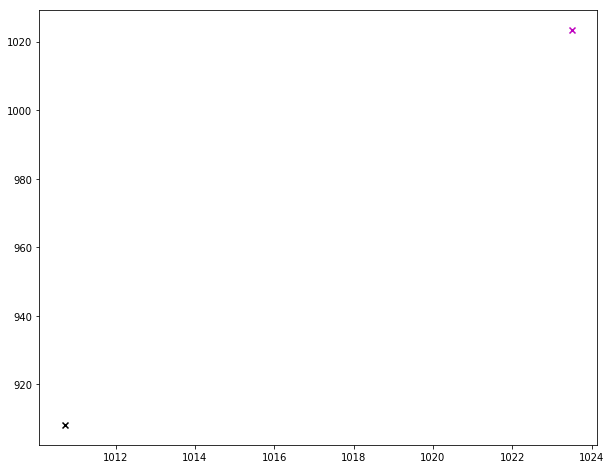

In [81]:
plt.clf()
fig = plt.figure(figsize=(10,8))
plt.scatter(xc,yc,marker='x', color='m',label='image center')
plt.scatter(x_d,y_d,marker='x',color='k',label='distortion center')
#plt.plot(lines[:,0], lines[:,1],'rx')
plt.plot(coords_subpix[:,1], coords_subpix[:,0],'bo')
plt.legend(loc='best')


In [82]:
## parabola coefficient in the new reference of distortion center
C_3 = A*x_d**2 + B*x_d + C - y_d
P_3 = M*y_d**2 + N*y_d + P - x_d
B_3 = 2*A*x_d + B
N_3 = 2*M*y_d + N



In [83]:
## slope of curvature versus offset in the lines
s_x = t[0]

## slope of curvature versus offset in columns
s_y = t2[0]

## aspect ratio
AR = np.sqrt(np.abs(s_x/s_y))
print AR



1.01764283975


In [84]:
## correcting the coefficients:
M_4 = M/AR
N_4 = N_3/AR
P_4 = P_3/AR

A_4 = A*AR**2
B_4 = B_3*AR
C_4 = C_3

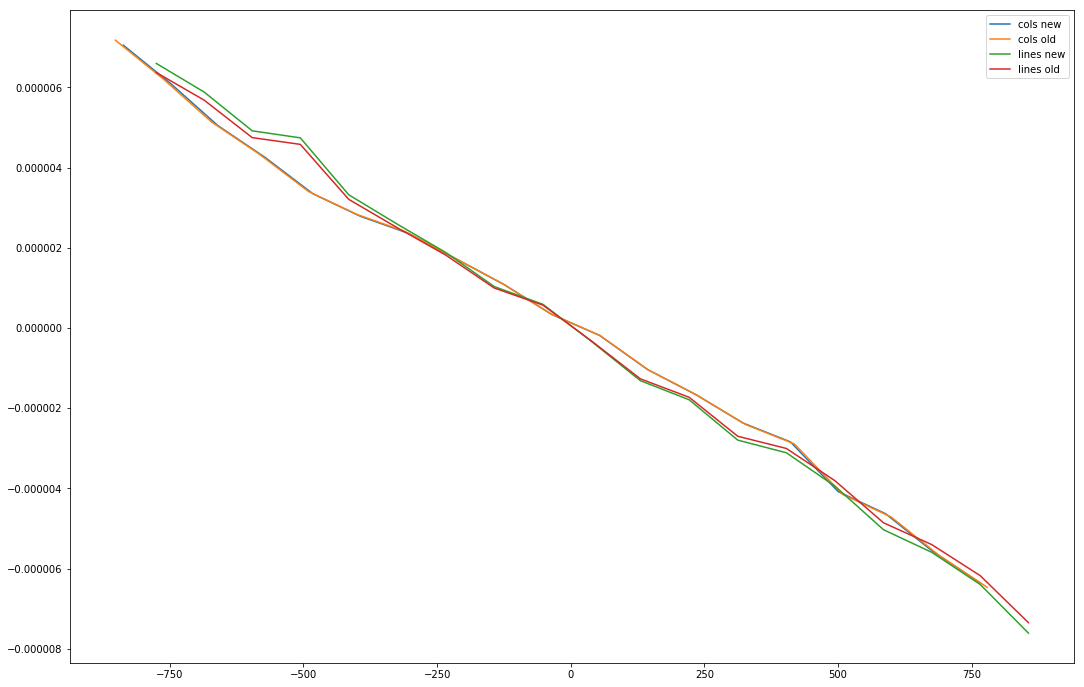

In [85]:
plt.figure(figsize=(18,12))
plt.plot(P_4,M_4,label='cols new')
plt.plot(P_3,M,label='cols old')
plt.plot(C_4,A_4,label='lines new')
plt.plot(C_3,A,label='lines old')
plt.legend()

plt.show()


8.32644721527e-09
8.24106812752e-09


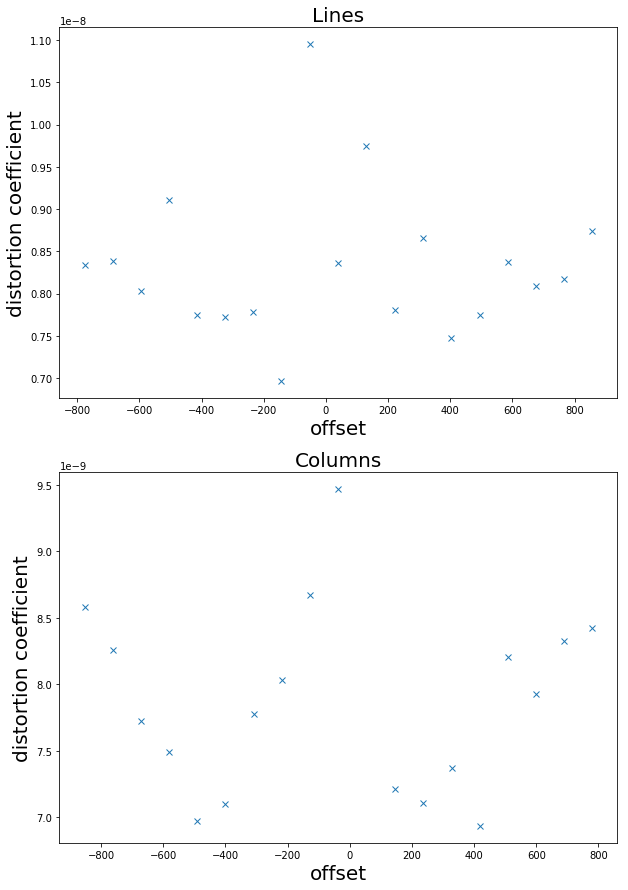

In [86]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


k_lines = (-A)/(C_3*(3*A*C_3 + 3*B_3**2 + 1))
ax.plot(C_3, k_lines,'x')
ax.set_ylabel('distortion coefficient',fontsize=20)
ax.set_xlabel('offset',fontsize=20)
ax.set_title('Lines',fontsize=20)

k_cols = (-M)/(P_3*(3*M*P_3+ 3*N_3**2 + 1))
r = [np.where(k_cols==k_cols.min())[0][0]]
ax2.plot(np.delete(P_3,r),np.delete(k_cols,r),'x')
ax2.set_ylabel('distortion coefficient',fontsize=20)
ax2.set_xlabel('offset',fontsize=20)
ax2.set_title('Columns',fontsize=20)
fig.subplots_adjust()
print k_lines.mean()
print np.average(k_lines,weights=np.abs(C_3))
#plt.savefig(path_paper+'ks.png',dpi=300)

In [87]:
t.shape

(2,)

8.62473489194e-09
8.53729306109e-09


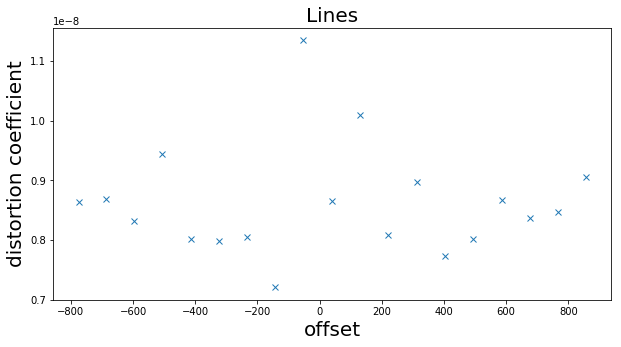

In [88]:


k_lines_4 = (-A_4)/(C_4*(3*A_4*C_4 + 3*B_4**2 + 1))
plt.figure(figsize=(10,5))
plt.plot(C_4, k_lines_4,'x')
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Lines',fontsize=20)
print k_lines_4.mean()
print np.average(k_lines_4,weights=np.abs(C_4))

7.63333520311e-09
7.85559881006e-09


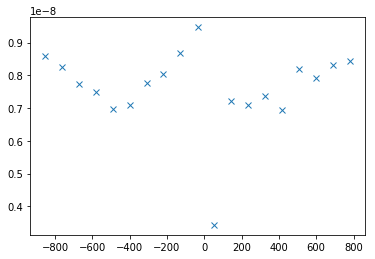

In [89]:
k_cols = (-M)/(P_3*(3*M*P_3+ 3*N_3**2 + 1))
plt.plot(P_3,k_cols,'x')
print k_cols.mean()
print np.average(k_cols,weights=np.abs(P_3))

7.63250787745e-09
7.85432677164e-09


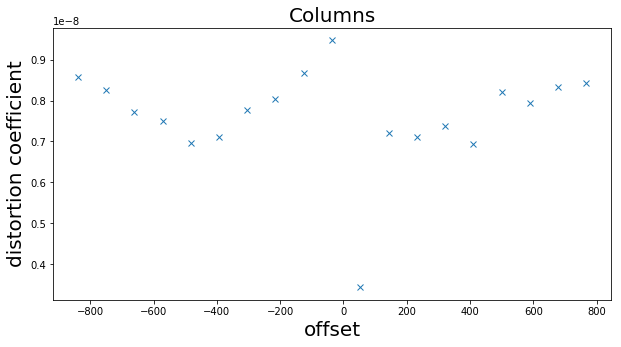

In [90]:
plt.figure(figsize=(10,5))
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Columns',fontsize=20)
k_cols_4 = (-M_4)/(P_4*(3*M*P_4+ 3*N_4**2 + 1))
plt.plot(P_4,k_cols_4,'x')
print k_cols_4.mean()
print np.average(k_cols_4,weights=np.abs(P_4))

In [91]:
K = np.array([k_lines.mean() ,k_cols.mean()])
print K.mean()
K = np.array([k_lines_4.mean() ,k_cols_4.mean()])
print K.mean()
K = np.array([np.average(k_lines, weights=np.abs(C_3)), np.average(k_cols, weights=np.abs(P_3))])
print K.mean()
K = np.array([np.average(k_lines_4, weights=np.abs(C_4)), np.average(k_cols_4, weights=np.abs(P_4))])
print K.mean()


7.97989120919e-09
8.12862138469e-09
8.04833346879e-09
8.19580991637e-09


In [92]:
print "the distortion coefficient is k =", K.mean()

the distortion coefficient is k = 8.19580991637e-09


In [97]:
k =K.mean()
# correcting for distortion
## loading all data points
f = np.loadtxt('/home/fatima/Desktop/solar_orbiter_project/codes/dont_touch/coordinates_linear_grid')
x = f[:,0]
y = f[:,1]
X_d = x#coords_subpix[:,1] 
Y_d = y#coords_subpix[:,0] 

In [98]:
X_u = X_d + (X_d - x_d )*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))
Y_u = Y_d + (Y_d - y_d)*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))

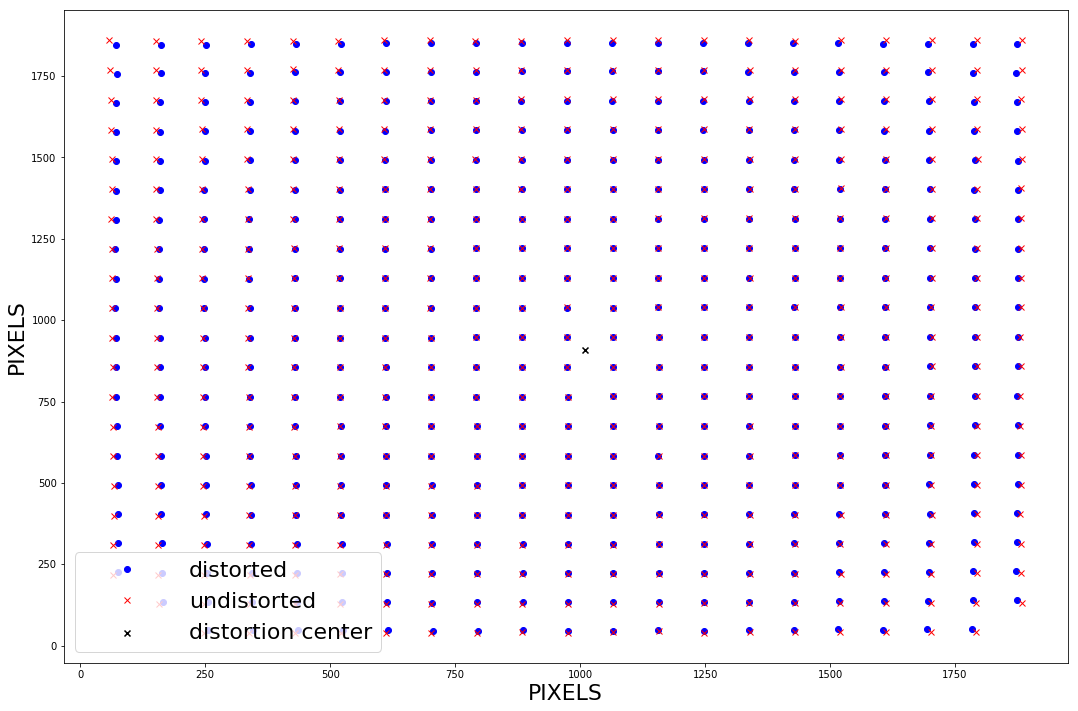

In [105]:
plt.clf()
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
#plt.scatter(xc,yc,marker='x',color='m',label='image center')
plt.scatter(x_d,y_d,marker='x',color='k',label='distortion center')
#plt.plot(lines[:,0], lines[:,1],'rx')
ax.plot(X_d, Y_d,'bo',label='distorted')
ax.plot(X_u,Y_u, 'rx',label='undistorted')
#rec = plt.Rectangle((0,0), width=Nx,height=Ny, fill='False')
#ax.add_patch(rec)
ax.set_xlabel('PIXELS',fontsize=22)
ax.set_ylabel('PIXELS',fontsize=22)
plt.legend(loc='best',fancybox=True, handlelength=4,fontsize=22)
plt.savefig(path_paper+'grid_d_u.png',dpi=250)

In [48]:
plate_scale = 0.5
d_m_pixels = np.sqrt((1./len(X_u))*np.sum((X_u-X_d)**2+(Y_u-Y_d)**2))
d_m_arc = d_m_pixels*plate_scale
d_m_km = d_m_arc*725
print "the distortion is around:",'\n', d_m_pixels, 'pixels', '\n', d_m_arc, 'arcseconds', '\n',d_m_km, 'km'

the distortion is around: 
5.66409607611 pixels 
2.83204803806 arcseconds 
2053.23482759 km


In [46]:
#another formula (works because the distortion is radial)
r_d = np.sqrt((X_d-x_d)**2 + (Y_d-y_d)**2)
rms =  np.sqrt((1./len(X_u))*np.sum((k*r_d**3)**2))
print rms

5.66409607611


In [47]:
np.sqrt(((X_u-X_d)**2+(Y_u-Y_d)**2)).max()


19.184895014909017

In [48]:
# disortionpercent:
D=((np.sqrt((X_d-x_d)**2+(Y_d-y_d)**2) - np.sqrt((X_u-x_d)**2+(Y_u-y_d)**2))/np.sqrt((X_u-x_d)**2+(Y_u-y_d)**2))*100
print D.mean()
print np.abs(D).max()


-0.484243345919
1.42431830614


[  2.68663285e-03  -7.79246798e+02] [  2.67627699e-03  -7.79211023e+02]
0.00268663284548
[  2.49307374e-03  -6.88513745e+02] [  2.47085728e-03  -6.88469519e+02]
0.00249307374047
[  2.33734433e-03  -5.97591322e+02] [  2.33446957e-03  -5.97613913e+02]
0.0023373443252
[  2.39648605e-03  -5.06993102e+02] [  2.35590157e-03  -5.06850295e+02]
0.00239648604768
[  2.15325668e-03  -4.15858007e+02] [  2.16128867e-03  -4.15908748e+02]
0.00215325667631
[  2.06828164e-03  -3.24932220e+02] [  2.07616074e-03  -3.24975145e+02]
0.00206828163857
[  1.92856320e-03  -2.33878821e+02] [  1.93409877e-03  -2.33905487e+02]
0.00192856320473
[  1.88326926e-03  -1.42860382e+02] [  1.89554073e-03  -1.42911783e+02]
0.00188326926208
[  1.74812480e-03  -5.19131702e+01] [  1.73718525e-03  -5.18695588e+01]
0.00174812480105
[  1.61727249e-03   3.91793789e+01] [  1.61776412e-03   3.91769705e+01]
0.00161727249307
[  1.51881532e-03   1.30503426e+02] [  1.53424849e-03   1.30441225e+02]
0.00151881532332
[  1.44211747e-03   2.

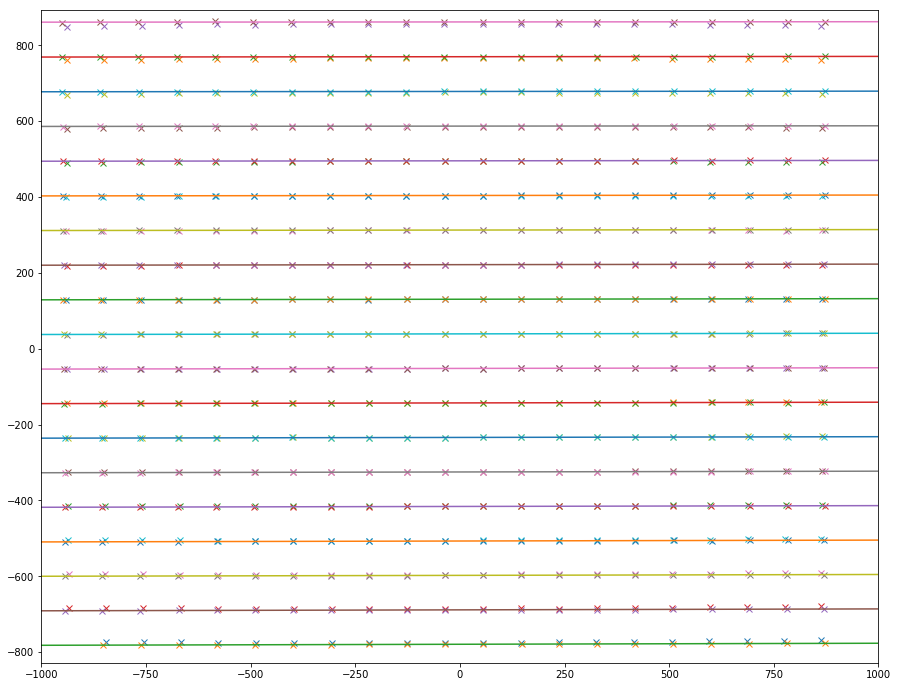

In [49]:
plt.clf()
fig=plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)


for line,n in zip(LINES,np.arange(len(A))):

    X_d = line[:,0] -x_d  
    Y_d = line[:,1] -y_d
    X_u = X_d + (X_d)*(k*((X_d)**2 + (Y_d)**2))
    Y_u = Y_d + (Y_d )*(k*((X_d)**2 + (Y_d)**2))
    params = np.array([B_3[n]*(3*k*C_3[n]**2 +1), C_3[n]*(k*C_3[n]**2+1)])
    xnew = np.linspace(-1000, 1000, 100)
    ynew = params[0]*xnew + params[1]
    t_temp = np.polyfit(X_u,Y_u,1)
    print params, t_temp
    ax.plot(X_d,Y_d,'x',label='distorted')
    ax.plot(X_u,Y_u,'x',label='undistorted')
    ax.plot(xnew, ynew,label='straight')
    ax.set_xlim(-1000,1000)
    ax.set_ylim(80-y_d,1800-y_d)
    print params[0]

#plt.legend()
plt.show()

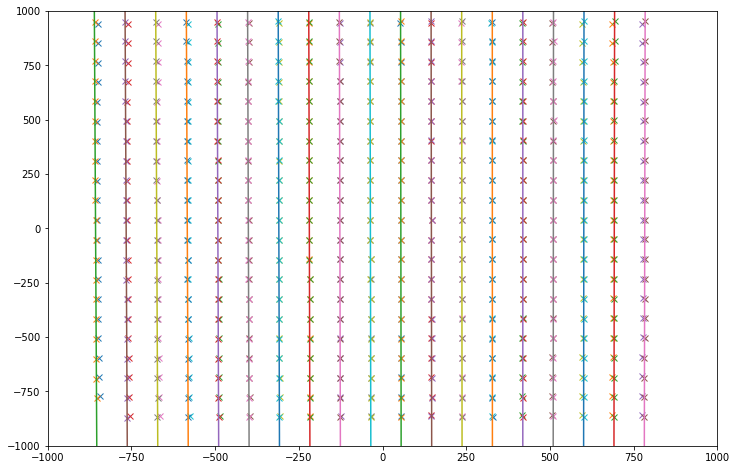

array([ -6.46849384e-06,   1.29613541e-02,   1.78368520e+03])

In [50]:
plt.clf()
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)


for col,n in zip(COLUMNS,np.arange(len(M))):
    X_d = col[:,0] - x_d
    Y_d = col[:,1] - y_d
    X_u = X_d + (X_d)*(k*((X_d)**2 + (Y_d)**2)) 
    Y_u = Y_d + (Y_d )*(k*((X_d)**2 + (Y_d)**2)) 
    params = np.array([N_3[n]*(3*k*P_3[n]**2 +1), P_3[n]*(k*P_3[n]**2+1)])
    ynew = np.linspace(-2000,2000, 100)
    xnew = params[0]*ynew + params[1]    
    ax.plot(X_d,Y_d,'x',label='distorted')
    ax.plot(X_u,Y_u,'x',label='undistorted')
    ax.plot(xnew, ynew,label='straight')
    ax.set_xlim(-1000,1000)
    ax.set_ylim(-1000,1000)
#plt.legend()
plt.show()


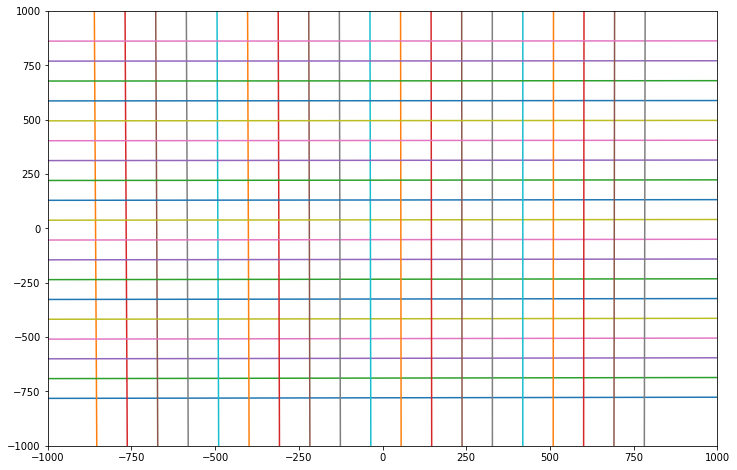

In [51]:
plt.clf()
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
n=0
for col,line in zip(COLUMNS,LINES):
    X_d = line[:,0] -x_d  
    Y_d = line[:,1] -y_d
    X_u = X_d + (X_d)*(k*((X_d)**2 + (Y_d)**2))
    Y_u = Y_d + (Y_d )*(k*((X_d)**2 + (Y_d)**2))
    params = np.array([B_3[n]*(3*k*C_3[n]**2 +1), C_3[n]*(k*C_3[n]**2+1)])
    xnew = np.linspace(-1000, 1000, 100)
    ynew = params[0]*xnew + params[1]
    ax.plot(xnew, ynew)
    
    X_d = col[:,0] - x_d
    Y_d = col[:,1] - y_d
    X_u = X_d + (X_d)*(k*((X_d)**2 + (Y_d)**2)) 
    Y_u = Y_d + (Y_d )*(k*((X_d)**2 + (Y_d)**2)) 
    params = np.array([N_3[n]*(3*k*P_3[n]**2 +1), P_3[n]*(k*P_3[n]**2+1)])
    ynew = np.linspace(-2000,2000, 100)
    xnew = params[0]*ynew + params[1] 
    ax.plot(xnew, ynew)
    #ax.set_xlim(-1000,1000)
    #ax.set_ylim(-1000,1000)
    n = n+1
    
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
    

plt.savefig(path_images+'grid_lines_undistorted.png', dpi=300) 
plt.show()


(20,) (20,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)


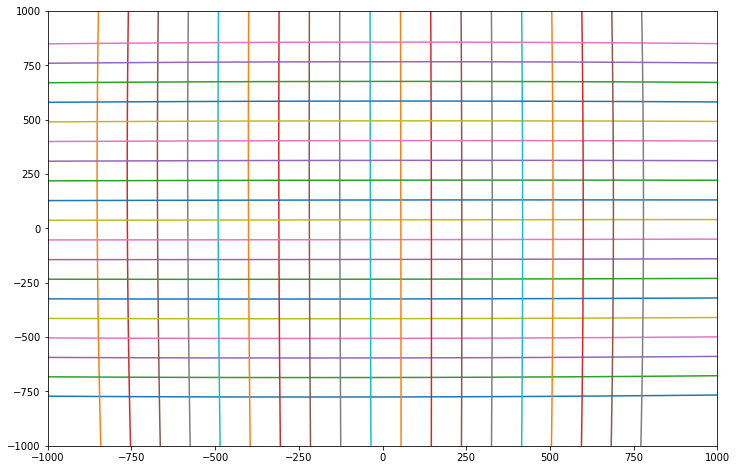

In [52]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
n=0
M = np.zeros(len(COLUMNS))
N =  np.zeros(len(COLUMNS))
P =  np.zeros(len(COLUMNS))

for col,line in zip(COLUMNS,LINES):
    x = line[:,0]-x_d; y = line[:,1]-y_d
    print x.shape, y.shape
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_lines,x,y,p0,maxfev=5000)
    A[n] = popt[0]; B[n] = popt[1]; C[n] = popt[2]
    xnew = np.linspace(-1000, 1000, 100)

    #xnew = np.linspace(0, 2048, 100)
    ynew = parabola_lines(xnew, *popt)
    ax.plot(xnew, ynew)
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    
    x = col[:,0]-x_d; y = col[:,1]-y_d
    temp1 = np.array([[y[0]**2,y[1]**2,y[1]**2], [y[0],y[1],y[2]],[1,1,1]])
    temp2 = np.array([x[0], x[1],x[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_columns, y,x,p0)
    M[n]=popt[0]; N[n] = popt[1]; P[n] = popt[2]
    ynew = np.linspace(-2000,2000, 100)

    #ynew = np.linspace(0, 2048, 100)
    xnew = parabola_columns(ynew, *popt)
    ax.plot(xnew, ynew)
    ax.set_xlim(-1000,1000)
    ax.set_ylim(-1000,1000)
    
    #ax.set_xlim(0,2048)
    #ax.set_ylim(0,2048)
    n = n+1
    
plt.savefig(path_images+'grid_lines_distorted.png', dpi=300) 
plt.show()
  
  